# HepatitisCdata Analysize


In [6]:
# Hi there!  
# This is my ml classification project, thank you for you time on this peer review.  

# The data here is (HepatitisCdata from kaggle)[https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset].  
# Here is the discribe of this data  

# Unnamed: 0     this is the patient id and we will remove this column    
# Category       diagnosis (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')  
# Age            the age of this patient, in years  
# Sex           f,m, we will encode this with label encoder  

# 👇 the feature blow is some laboratory datas and we don't have to figure out the meaning  

# ALB            
# ALP             
# ALT             
# AST             
# BIL             
# CHE             
# CHOL              
# GGT  
# PROT            

In [7]:
# the objective of this analysis is to predict the Category of the given data

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
raw_data = pd.read_csv("./HepatitisCdata.csv")
raw_data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [8]:
# first, the dea part

In [18]:
raw_data.Sex.unique().tolist()

['m', 'f']

In [24]:
def data_clean(df:pd.DataFrame,le_y,le_s):
    # in this func, we will
    # 1. dorp the ID column
    # 2. clean the Category cloume and encode them with label encoder
    # 3. encode the Sex col with 0,1
    df_temp = df.drop('Unnamed: 0',axis=1) #  step 1
    df_temp["Category"] = le_y.transform(df["Category"]) # step 2
    df_temp["Sex"] = le_s.transform(df["Sex"]) # step 3
    return df_temp

le_y = LabelEncoder().fit(['0=Blood Donor',
                                '0s=suspect Blood Donor',
                                '1=Hepatitis',
                                '2=Fibrosis',
                                '3=Cirrhosis'])
le_s = LabelEncoder().fit(['m', 'f'])
df = data_clean(df=raw_data, le_y=le_y, le_s=le_s)

<Axes: xlabel='Category'>

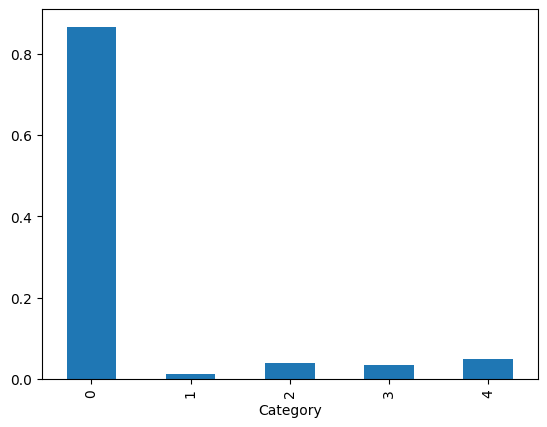

In [33]:
# array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis','2=Fibrosis', '3=Cirrhosis'], dtype='<U22')
df["Category"].value_counts(normalize=True).sort_index().plot(kind="bar")

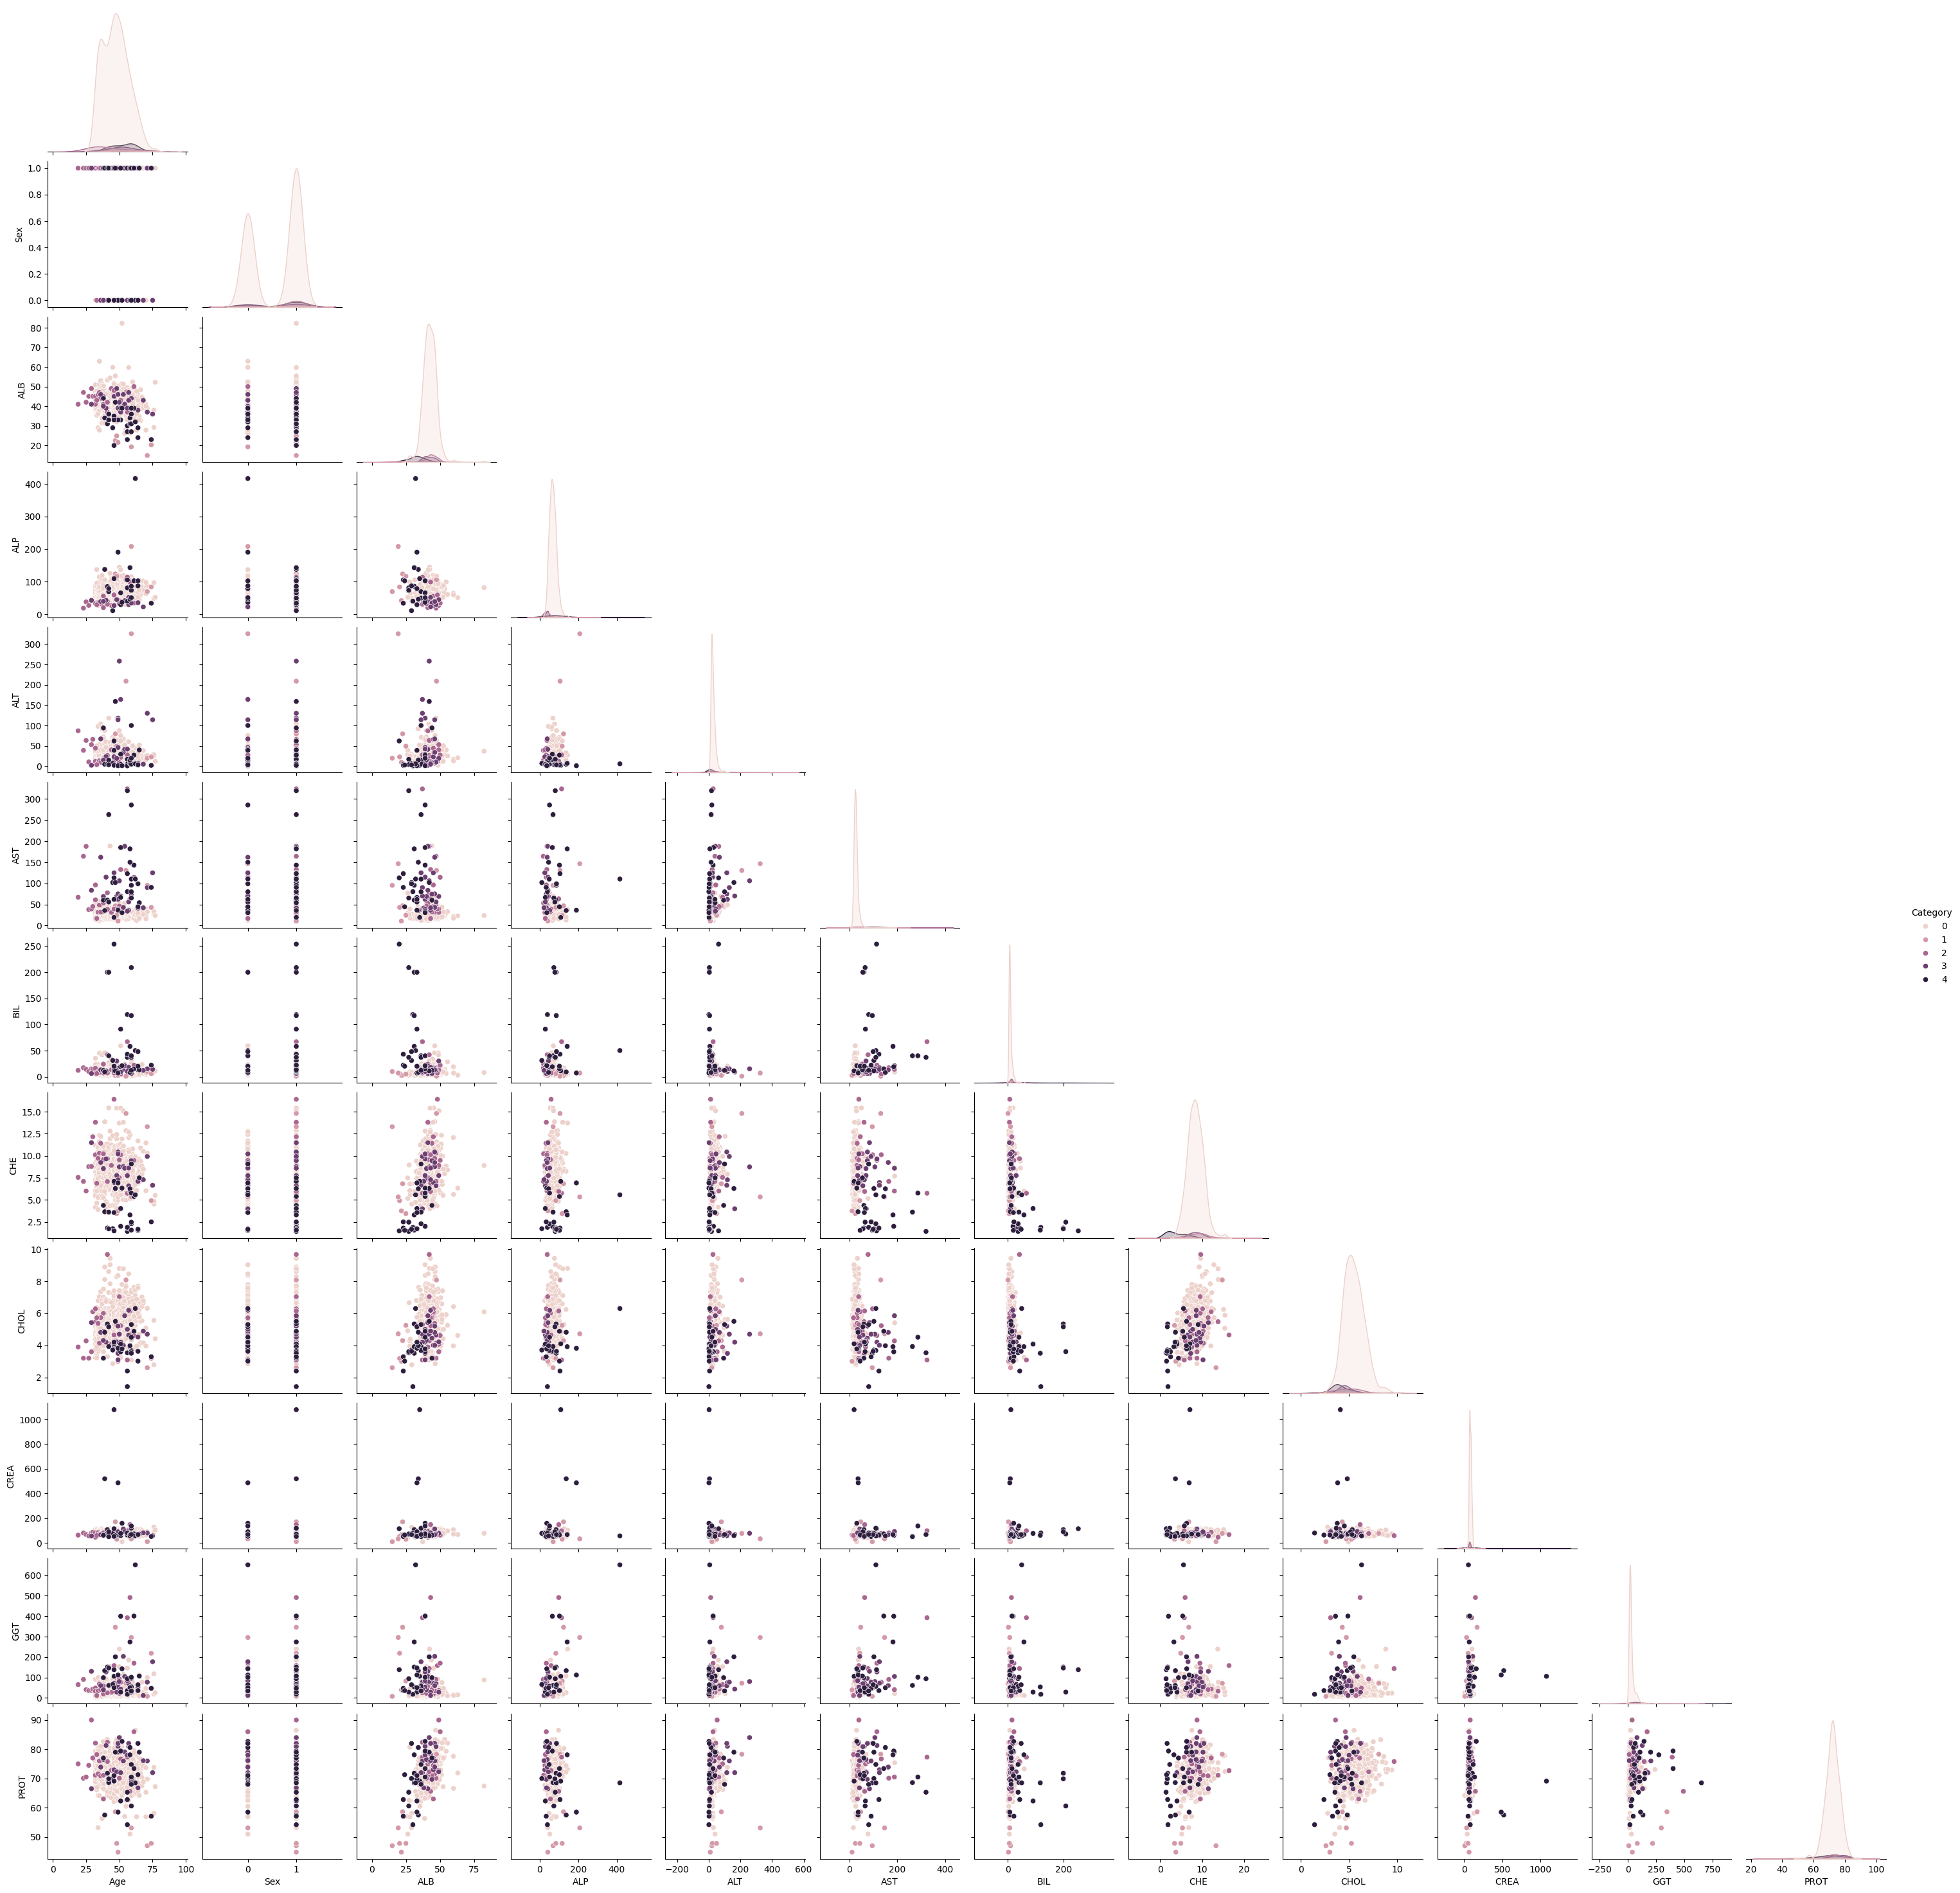

In [37]:
_ = sns.pairplot(data=df, hue="Category", corner=True)

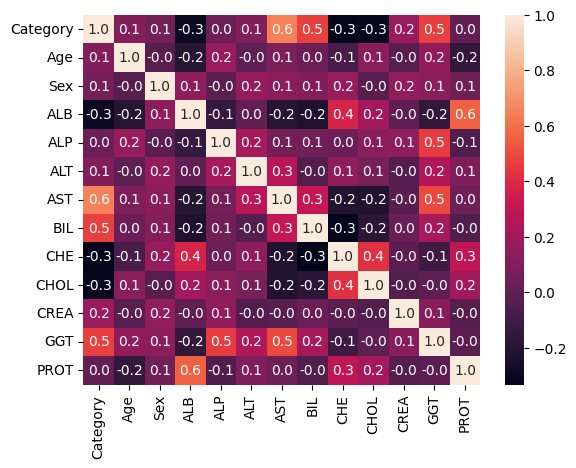

In [39]:
_  = sns.heatmap(df.corr(), annot=True, fmt=".1f")
# coor between PROT and ALB is .6 and others not seems like has strong relations

In [40]:
# 不进行数据增广， 直接建模
# 进行数据增广，在进行数据建模
# 数据增广进行 grid search 
# 建模方式进行 grid search